# Get bounding boxes for blocks and lines of text on each page.

### References:

- <a href="https://numpy.org/">NumPy</a>

- <a href="https://tesseract-ocr.github.io/tessdoc/Home.html">Tesseract User Manual</a>

- [pytesseract PyPI](https://pypi.org/project/pytesseract/)

In [1]:
import threading
import img2text as i2t
from screen2Text import screen2text as s2t
from tqdm import tqdm

import matplotlib.pyplot as plt

>> img2text imported.
>> screen2text imported.


In [2]:
i2t.pytesseract.pytesseract.tesseract_cmd

'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [3]:
s2t.ClipImg2Text.config_dict

{0: 'Orientation and script detection (OSD) only.',
 1: 'Automatic page segmentation with OSD.',
 2: 'Automatic page segmentation, but no OSD, or OCR.',
 3: 'Fully automatic page segmentation, but no OSD. (Default)',
 4: 'Assume a single column of text of variable sizes.',
 5: 'Assume a single uniform block of vertically aligned text.',
 6: 'Assume a single uniform block of text.',
 7: 'Treat the image as a single text line.',
 8: 'Treat the image as a single word.',
 9: 'Treat the image as a single word in a circle.',
 10: 'Treat the image as a single character.',
 11: 'Sparse text. Find as much text as possible in no particular order.',
 12: 'Sparse text with OSD.',
 13: 'Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.'}

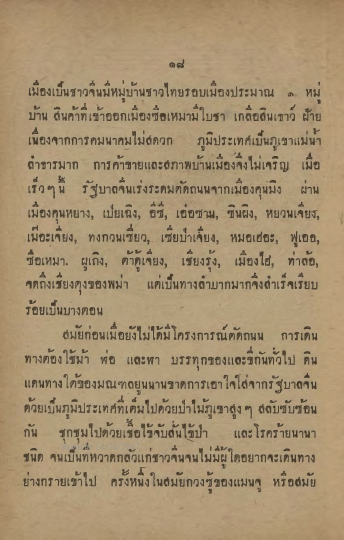

In [4]:
source_dir = 'pages/clipped_RGB/'
im = i2t.Image.open(source_dir + 'page_043.png')

im.reduce(2)

In [5]:
im.info

{}

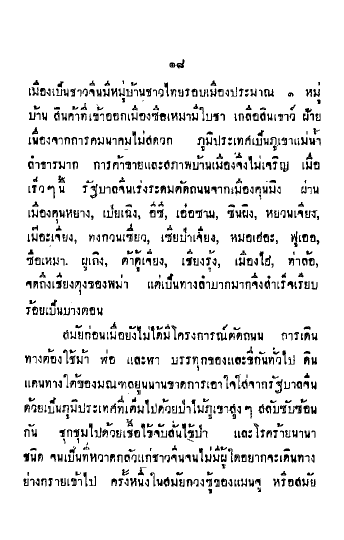

In [6]:
i2t.binarize_as_array(im).convert('L').reduce(2)

In [7]:
_ = i2t.tesseract_osd(im)

Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 11.15', 'Script: Thai', 'Script confidence: 19.00', '']


In [8]:
_ = i2t.tesseract_osd(im.convert('L'))

Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 13.20', 'Script: Thai', 'Script confidence: 15.28', '']


In [9]:
_ = i2t.tesseract_osd(i2t.binarize_as_array(im.convert('L'), 'otsu'))

Tesseract: ['Page number: 0', 'Orientation in degrees: 0', 'Rotate: 0', 'Orientation confidence: 13.20', 'Script: Thai', 'Script confidence: 15.28', '']


 - reduced to (551, 864)
 - no adjustment needed


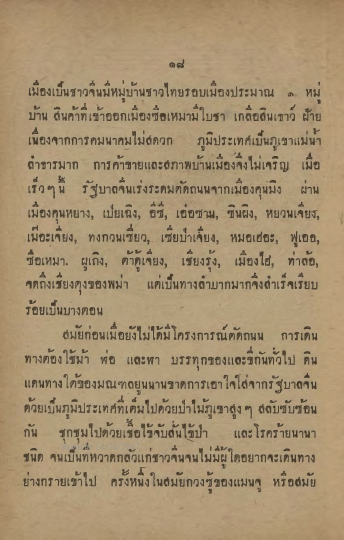

In [10]:
i2t.deskew(im, True).reduce(2)

### Getting image segmengtation data from tesseract as a pandas dataframe

In [11]:
data = i2t.pd.DataFrame(i2t.pytesseract.image_to_data(i2t.binarize_as_array(im), output_type='data.frame'))
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,688,1080,-1.000000,NaN
1,2,1,1,0,0,0,339,118,30,19,-1.000000,NaN
2,3,1,1,1,0,0,339,118,30,19,-1.000000,NaN
3,4,1,1,1,1,0,339,118,30,19,-1.000000,NaN
4,5,1,1,1,1,1,339,118,30,19,82.249634,od
...,...,...,...,...,...,...,...,...,...,...,...,...
201,4,1,3,1,2,0,47,940,584,47,-1.000000,NaN
202,5,1,3,1,2,1,47,940,145,42,0.000000,danrwiatial
203,5,1,3,1,2,2,223,956,75,17,17.776726,prams
204,5,1,3,1,2,3,310,945,212,42,0.000000,ludNenasTaeaNy


In [12]:
na = data[data.text.isna()]
na

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,688,1080,-1.0,NaN
1,2,1,1,0,0,0,339,118,30,19,-1.0,NaN
2,3,1,1,1,0,0,339,118,30,19,-1.0,NaN
3,4,1,1,1,1,0,339,118,30,19,-1.0,NaN
5,2,1,2,0,0,0,47,160,595,777,-1.0,NaN
6,3,1,2,1,0,0,47,160,595,777,-1.0,NaN
7,4,1,2,1,1,0,66,160,574,15,-1.0,NaN
12,4,1,2,1,2,0,58,165,582,40,-1.0,NaN
16,4,1,2,1,3,0,67,199,574,27,-1.0,NaN
23,4,1,2,1,4,0,58,214,583,28,-1.0,NaN


In [13]:
na.level.unique().tolist()

[1, 2, 3, 4]

In [14]:
na[na.level == 1]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,688,1080,-1.0,NaN


In [15]:
im.size

(688, 1080)

In [16]:
na[na.level == 2]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
1,2,1,1,0,0,0,339,118,30,19,-1.0,NaN
5,2,1,2,0,0,0,47,160,595,777,-1.0,NaN
191,2,1,3,0,0,0,47,934,584,53,-1.0,NaN


In [17]:
na[na.level == 3]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
2,3,1,1,1,0,0,339,118,30,19,-1.0,NaN
6,3,1,2,1,0,0,47,160,595,777,-1.0,NaN
192,3,1,3,1,0,0,47,934,584,53,-1.0,NaN


In [18]:
na[na.level == 4]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
3,4,1,1,1,1,0,339,118,30,19,-1.0,NaN
7,4,1,2,1,1,0,66,160,574,15,-1.0,NaN
12,4,1,2,1,2,0,58,165,582,40,-1.0,NaN
16,4,1,2,1,3,0,67,199,574,27,-1.0,NaN
23,4,1,2,1,4,0,58,214,583,28,-1.0,NaN
30,4,1,2,1,5,0,64,254,575,19,-1.0,NaN
36,4,1,2,1,6,0,57,262,585,40,-1.0,NaN
39,4,1,2,1,7,0,62,305,563,15,-1.0,NaN
46,4,1,2,1,8,0,56,312,583,32,-1.0,NaN
52,4,1,2,1,9,0,62,347,551,26,-1.0,NaN


To all appearances:

- level 1 -> page (entire image)
- level 2 -> blocks
- level 3 -> paragraphs
- level 4 -> lines
- level 5 -> whatever they define as "words"

With numbering restarting within each level

### Finding text block boundaries, na-based + level

In [19]:
blocks = data[data.text.isna() & (data.level == 2)]
blocks

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
1,2,1,1,0,0,0,339,118,30,19,-1.0,NaN
5,2,1,2,0,0,0,47,160,595,777,-1.0,NaN
191,2,1,3,0,0,0,47,934,584,53,-1.0,NaN


In [20]:
block_boxes = {'boxes': {}, 'params': {}}
for i, row in blocks.iterrows():
    block_boxes['boxes'][row.block_num] = row.left, row.top, row.left + row.width, row.top + row.height

block_boxes

{'boxes': {1: (339, 118, 369, 137),
  2: (47, 160, 642, 937),
  3: (47, 934, 631, 987)},
 'params': {}}

{1: (338, 118, 369, 137), 2: (47, 159, 642, 991)}


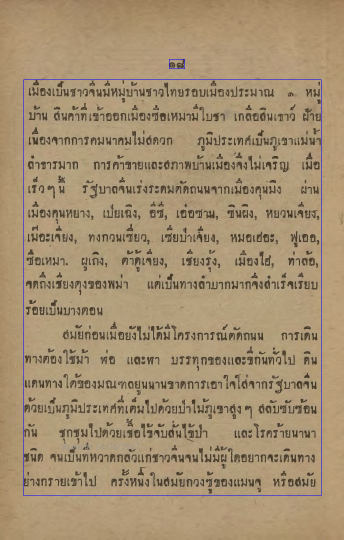

In [21]:
pp = i2t.Preprocessor(im)
pp.find_all_blocks()

print(pp.block_boxes['boxes'])
display(pp.draw_blocks().reduce(2))

In [25]:
pp.block_boxes['params']['psm']

6

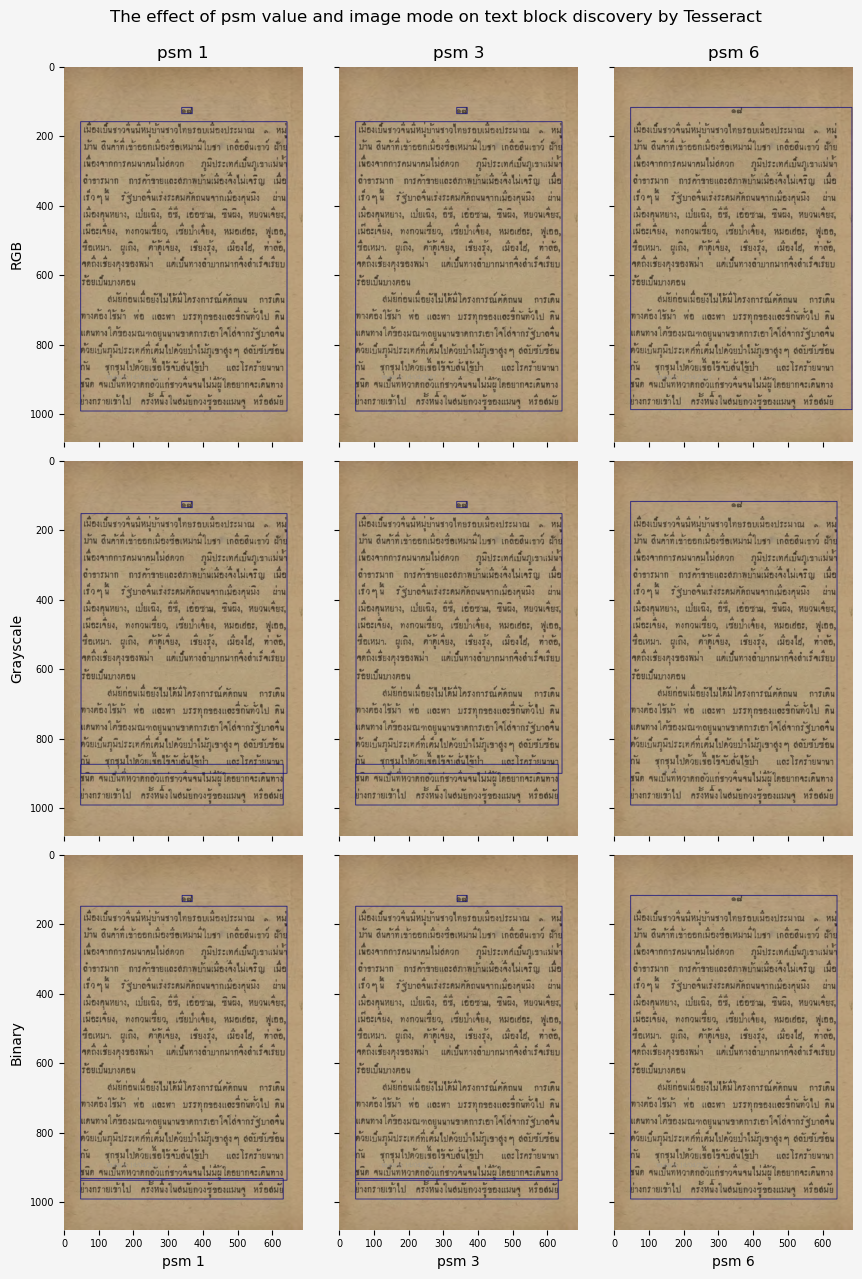

In [23]:
pp.show_block_variants()

### Batch segmentation - text blocks

#### Sequentially

In [33]:
dst_dir = source_dir + 'blocks/'

In [31]:
for entry in tqdm(list(i2t.os.scandir(source_dir))):
    name = entry.name
    if name.endswith('.png'):
        pp = i2t.Preprocessor(i2t.Image.open(entry.path))
        pp.find_all_blocks(psm=3)
        # print(f'{name}: ', pp.blocks)
        out_im = pp.draw_blocks()
        out_im.save(source_dir + dst_dir + name.replace('.', '_blocks.'))

100%|██████████| 656/656 [12:32<00:00,  1.15s/it]


#### In parallel threads

In [35]:
def batch_find_blocks(dir_entries, dst_dir):
    for entry in dir_entries:
        name = entry.name
        if name.endswith('.png'):
            pp = i2t.Preprocessor(i2t.Image.open(entry.path))
            pp.find_all_blocks(psm=3)
            # print(f'{name}: ', pp.blocks)
            out_im = pp.draw_blocks()
            out_im.save(dst_dir + name.replace('.png',
                                               f'_blocks_{pp.block_boxes["params"]["psm"]}_{pp.block_boxes["params"]["mode"]}.png'))

In [28]:
source_dir

'pages/clipped_RGB/'

In [37]:
entries = [entry for entry in list(i2t.os.scandir(source_dir)) if entry.name.endswith('.png')]

if len(entries) > 12:
    f_array = i2t.np.array(entries)
    print(f_array.size)
    chunks = i2t.np.array_split(f_array, 6)

    threads = [threading.Thread(target=batch_find_blocks, args=(chunk, dst_dir), name=f'{chunk[0].name}...{chunk[-1].name}') for chunk in chunks]
    start = s2t.dt.now()
    print(f'Starting: {start}')
    for thread in threads:
        thread.start()
    for thread in threads:
        thread.join()
        print(thread)
    print(f'Done in {s2t.dt.now() - start}')


654
<DirEntry 'page_001.png'> ... <DirEntry 'page_109.png'>
<DirEntry 'page_110.png'> ... <DirEntry 'page_218.png'>
<DirEntry 'page_219.png'> ... <DirEntry 'page_327.png'>
<DirEntry 'page_328.png'> ... <DirEntry 'page_436.png'>
<DirEntry 'page_437.png'> ... <DirEntry 'page_545.png'>
<DirEntry 'page_546.png'> ... <DirEntry 'page_654.png'>
Starting: 2024-05-08 17:12:10.118255
<Thread(page_001.png...page_109.png, stopped 11956)>
<Thread(page_110.png...page_218.png, stopped 4940)>
<Thread(page_219.png...page_327.png, stopped 17884)>
<Thread(page_328.png...page_436.png, stopped 18336)>
<Thread(page_437.png...page_545.png, stopped 8988)>
<Thread(page_546.png...page_654.png, stopped 15696)>
Done in 0:02:31.300276


## Evaluation of the results